In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
df_train = pd.read_csv("./train.tsv",sep="\t")
df_test = pd.read_csv("./test.tsv",sep="\t")
df_sample_submit = pd.read_csv("./sample_submit.csv",header=None)
display(df_train.head())
display(df_test.head())
display(df_sample_submit.tail())

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx
1,3,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
2,9,32.7,6,168.0,132,2910,11.4,80,3,datsun 280-zx
3,11,38.1,4,89.0,60,1968,18.8,80,3,toyota corolla tercel
4,13,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw)


,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
1,2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
2,4,6,156.0,108,2930,15.5,76,3,toyota mark ii
3,5,4,108.0,70,2245,16.9,82,3,toyota corolla
4,6,4,105.0,63,2125,14.7,82,1,plymouth horizon miser


,0,1
194,391,29
195,392,31
196,393,27
197,394,27
198,397,13


In [3]:
df_horsepower = df_train[df_train["horsepower"] != "?"]
df_horsepower["horsepower"] = df_horsepower["horsepower"].astype("int64")
horsepower_mean= df_horsepower["horsepower"].mean()
horsepower_mean
df_train["horsepower"] = df_train["horsepower"].apply(lambda x: horsepower_mean if x == "?" else x)
df_train["horsepower"] = df_train["horsepower"].astype("int64")
df_train.mean()

C:\Users\cax68\AppData\Local\Temp/ipykernel_15664/700271369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horsepower["horsepower"] = df_horsepower["horsepower"].astype("int64")
C:\Users\cax68\AppData\Local\Temp/ipykernel_15664/700271369.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.mean()


Unnamed: 0       200.170854
mpg               22.997990
cylinders          5.527638
displacement     200.889447
horsepower       107.246231
weight          3063.326633
acceleration      15.599497
model year        75.904523
origin             1.587940
dtype: float64

In [4]:
df_train["car maker"] = df_train["car name"].apply(lambda x : x.split()[0])
display(df_train.head())

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car maker
0,0,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx,datsun
1,3,18.0,6,171.0,97,2984,14.5,75,1,ford pinto,ford
2,9,32.7,6,168.0,132,2910,11.4,80,3,datsun 280-zx,datsun
3,11,38.1,4,89.0,60,1968,18.8,80,3,toyota corolla tercel,toyota
4,13,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw),dodge


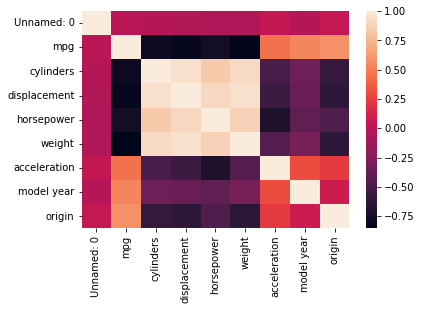

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
Unnamed: 0,1.000000,-0.005616,-0.025172,-0.039416,-0.044259,-0.050945,0.033751,-0.022741,0.040376
mpg,-0.005616,1.000000,-0.793012,-0.820597,-0.764077,-0.854548,0.445578,0.531445,0.575644
cylinders,-0.025172,-0.793012,1.000000,0.947816,0.833945,0.909054,-0.495192,-0.327977,-0.598204
displacement,-0.039416,-0.820597,0.947816,1.000000,0.902293,0.946437,-0.559381,-0.352672,-0.636646
horsepower,-0.044259,-0.764077,0.833945,0.902293,1.000000,0.872744,-0.711227,-0.393492,-0.471399
weight,-0.050945,-0.854548,0.909054,0.946437,0.872744,1.000000,-0.453418,-0.290512,-0.631557
acceleration,0.033751,0.445578,-0.495192,-0.559381,-0.711227,-0.453418,1.000000,0.310780,0.238708
model year,-0.022741,0.531445,-0.327977,-0.352672,-0.393492,-0.290512,0.310780,1.000000,0.072809
origin,0.040376,0.575644,-0.598204,-0.636646,-0.471399,-0.631557,0.238708,0.072809,1.000000


In [5]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix)
plt.show()
display(corr_matrix)

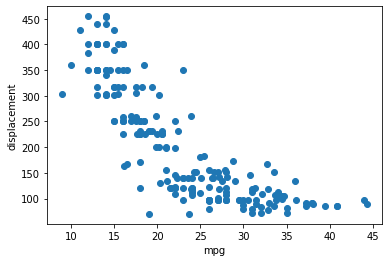

In [13]:
plt.scatter(df_train['mpg'],df_train['displacement'])

# x軸とy軸に名前を付与
plt.ylabel('displacement')
plt.xlabel('mpg')

# 可視化結果を表示する為に必要な関数
plt.show()

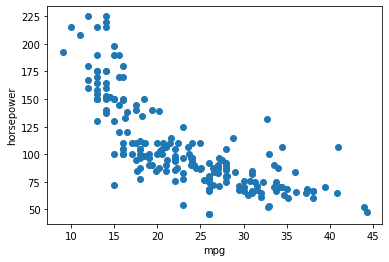

In [14]:
plt.scatter(df_train['mpg'],df_train['horsepower'])

# x軸とy軸に名前を付与
plt.ylabel('horsepower')
plt.xlabel('mpg')

# 可視化結果を表示する為に必要な関数
plt.show()

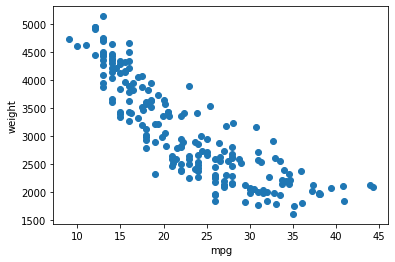

In [52]:
plt.scatter(df_train['mpg'],df_train['weight'])

# x軸とy軸に名前を付与
plt.ylabel('weight')
plt.xlabel('mpg')

# 可視化結果を表示する為に必要な関数
plt.show()

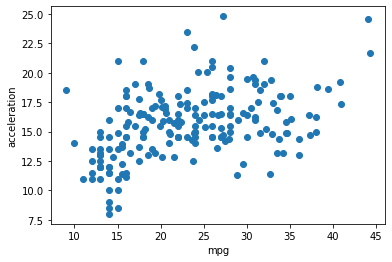

In [6]:
plt.scatter(df_train['mpg'],df_train['acceleration'])

# x軸とy軸に名前を付与
plt.ylabel('acceleration')
plt.xlabel('mpg')

# 可視化結果を表示する為に必要な関数
plt.show()

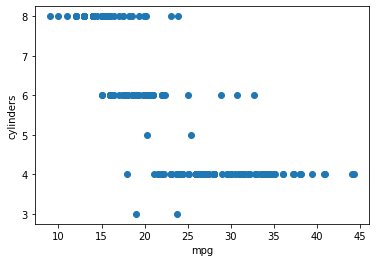

In [12]:
plt.scatter(df_train['mpg'],df_train['cylinders'])

# x軸とy軸に名前を付与
plt.ylabel('cylinders')
plt.xlabel('mpg')

# 可視化結果を表示する為に必要な関数
plt.show()

In [6]:
display(df_train["cylinders"].value_counts())
display(df_train["model year"].value_counts())
display(df_train["origin"].value_counts())

4    98
8    55
6    42
5     2
3     2
Name: cylinders, dtype: int64

78    20
77    19
72    18
76    17
73    17
70    16
80    15
79    15
74    14
82    14
71    13
81    11
75    10
Name: model year, dtype: int64

1    124
3     42
2     33
Name: origin, dtype: int64

In [23]:
print(df_train.groupby(["model year","car maker"])["mpg"].mean())


model year  car maker
70          amc          18.000000
            audi         24.000000
            chevrolet    14.000000
            datsun       27.000000
            ford         15.333333
                           ...    
82          dodge        32.500000
            ford         26.000000
            honda        38.000000
            pontiac      29.000000
            vw           44.000000
Name: mpg, Length: 146, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


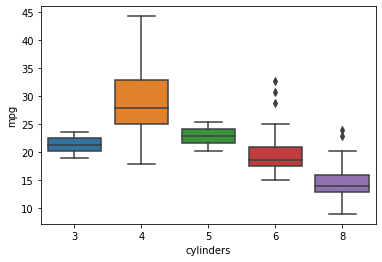

In [8]:
# boxplotの描画
sns.boxplot('cylinders','mpg', data=df_train)

# 可視化結果を表示する為に必要な関数
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


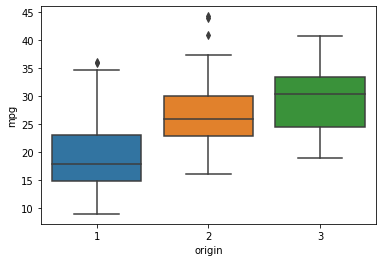

In [67]:
# boxplotの描画
sns.boxplot('origin','mpg', data=df_train)

# 可視化結果を表示する為に必要な関数
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


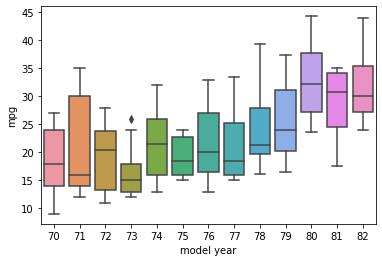

In [56]:
# boxplotの描画
sns.boxplot('model year','mpg', data=df_train)

# 可視化結果を表示する為に必要な関数
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


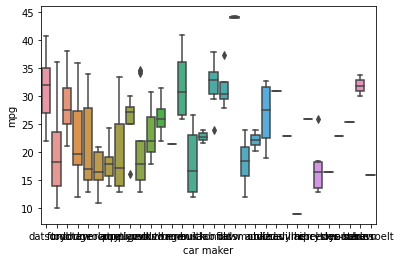

In [65]:
# boxplotの描画
sns.boxplot('car maker','mpg', data=df_train)

# 可視化結果を表示する為に必要な関数
plt.show()

In [12]:
target_col = ["mpg"]
feature_col = ["cylinders","displacement","horsepower","weight","model year","origin"]
y = df_train[target_col]
X = df_train[feature_col]
model = Ridge()
model.fit(X,y)

Ridge()

In [13]:
df_train["pred_mpg"] = model.predict(X)
df_train[["mpg","pred_mpg"]].tail()

,mpg,pred_mpg
194,27.0,26.042392
195,26.0,28.539298
196,29.0,29.926208
197,31.3,30.565057
198,15.5,16.591921


In [14]:
mean_absolute_error(df_train["mpg"],df_train["pred_mpg"])

2.448655043138092

In [15]:
display(df_test[df_test["horsepower"] == "?"])
df_horsepower = df_train[df_test["horsepower"] != "?"]
df_horsepower["horsepower"] = df_horsepower["horsepower"].astype("int64")
horsepower_mean= df_horsepower["horsepower"].mean()
print(horsepower_mean)
df_test["horsepower"] = df_test["horsepower"].apply(lambda x: horsepower_mean if x == "?" else x)
df_test["horsepower"] = df_test["horsepower"].astype("int64")
display(df_test[df_test["horsepower"] == "?"])
print(df_train.mean())
display(df_test.head())

,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
50,101,4,151.0,?,3035,20.5,82,1,amc concord dl
85,164,6,200.0,?,2875,17.0,74,1,ford maverick
181,363,4,98.0,?,2046,19.0,71,1,ford pinto


106.72448979591837


C:\Users\cax68\AppData\Local\Temp/ipykernel_15664/500584516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horsepower["horsepower"] = df_horsepower["horsepower"].astype("int64")


,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


Unnamed: 0       200.170854
mpg               22.997990
cylinders          5.527638
displacement     200.889447
horsepower       107.246231
weight          3063.326633
acceleration      15.599497
model year        75.904523
origin             1.587940
pred_mpg          22.997990
dtype: float64


C:\Users\cax68\AppData\Local\Temp/ipykernel_15664/500584516.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.mean())


,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
1,2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
2,4,6,156.0,108,2930,15.5,76,3,toyota mark ii
3,5,4,108.0,70,2245,16.9,82,3,toyota corolla
4,6,4,105.0,63,2125,14.7,82,1,plymouth horizon miser


In [19]:
feature_col = ["cylinders","displacement","horsepower","weight","model year","origin"]
X = df_test[feature_col]
df_test["mpg"] = model.predict(X)
df_test["mpg"] = df_test["mpg"].astype("int64")
display(df_test.tail())
print(df_test.info())

,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
194,391,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic,14
195,392,8,318.0,150,4237,14.5,73,1,plymouth fury gran sedan,12
196,393,8,350.0,145,4055,12.0,76,1,chevy c10,16
197,394,3,80.0,110,2720,13.5,77,3,mazda rx-4,26
198,397,4,120.0,74,2635,18.3,81,3,mazda 626,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    199 non-null    int64  
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    float64
 3   horsepower    199 non-null    int64  
 4   weight        199 non-null    int64  
 5   acceleration  199 non-null    float64
 6   model year    199 non-null    int64  
 7   origin        199 non-null    int64  
 8   car name      199 non-null    object 
 9   mpg           199 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 15.7+ KB
None


In [20]:
df_sample_submit[1]=df_test["mpg"]
display(df_sample_submit.tail())

,0,1
194,391,14
195,392,12
196,393,16
197,394,26
198,397,30


In [21]:
df_sample_submit.to_csv("E:\Documents\Python\SIGNATE\都市サイクルの燃料消費量予測\sample_submit.csv",index=False,header=None)